In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from simsimpy import *
import random

In [14]:
# simulation for thesis single carrier
carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate
fs = 4e6
time = 0.5#2

index = 0

print(carriers[index])
phase_offset = random.uniform(-np.pi, np.pi)
offset = random.uniform(-T_symbols[0], T_symbols[0])
amplitude = random.uniform(0.5, 2)

msk_data_single, t, _ , phase = generate_msk(int(time/T_symbols[index]), 0.5, T_symbols[index], carriers[index], fs, offset=offset, phase_offset=phase_offset, amplitude=amplitude)


# downconvert
msk_data_single_down = msk_data_single * np.exp(-1j*2*np.pi*carriers[index]*t)

# filter
sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_single_down[0:int(fs*T_symbols[index])]), msk_data_single_down)
msk_data_single_filtered = signal.sosfilt(sos, temp)[int(fs*T_symbols[index]):]


# estimate amplitude
a_hat = amplitude_estimation(msk_data_single_filtered)

#print("Amplitude: ", np.round(amplitude, 4), "Estimated: ", np.round(a_hat,4), "Error: ", np.round(np.abs(amplitude - a_hat),4))
print( f' & {np.round(amplitude, 4)} & {np.round(a_hat,4)} & {np.round(np.abs(amplitude - a_hat),4)}')

# with noise
msk_data_single = msk_data_single + np.random.normal(0, 5, msk_data_single.shape)

# downconvert
msk_data_single_down = msk_data_single * np.exp(-1j*2*np.pi*carriers[index]*t)

# filter
sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_single_down[0:int(fs*T_symbols[index])]), msk_data_single_down)
msk_data_single_filtered = signal.sosfilt(sos, temp)[int(fs*T_symbols[index]):]


# estimate amplitude
a_hat = amplitude_estimation(msk_data_single_filtered)

#print("with noise")
#print("Amplitude: ", np.round(amplitude, 4), "Estimated: ", np.round(a_hat,4), "Error: ", np.round(np.abs(amplitude - a_hat),4))
print( f' & {np.round(a_hat,4)} & {np.round(np.abs(amplitude - a_hat),4)}')


16400.0
 & 1.0604 & 1.0587 & 0.0016
 & 1.0643 & 0.0039


In [23]:
# simulation for thesis multi carrier
carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate
fs = 4e6
time = 0.5#2

index = 0

print(carriers[index])

t = np.linspace(0, time, int(fs*time))
msk_data = np.zeros_like(t)
amplitude = np.zeros(len(carriers))
msk_data_single = np.zeros((len(carriers),len(t)))
for i, (carrier, T) in enumerate(zip(carriers, T_symbols)):    
    offset = random.uniform(0, T_symbols[i])
    phase_offset = random.uniform(-np.pi, np.pi)
    amplitude[i] = random.uniform(0.5, 2)
    msk_data_single[i], _, _, _ = generate_msk(int(time/T), 0.5, T, carrier, fs, offset=offset, phase_offset=phase_offset, amplitude=amplitude[i])
    msk_data += msk_data_single[i]

# downconvert
msk_data_down = msk_data * np.exp(-1j*2*np.pi*carriers[index]*t)
msk_data_single_down = msk_data_single[index] * np.exp(-1j*2*np.pi*carriers[index]*t)

# filter
sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_down[0:int(fs*T_symbols[index])]), msk_data_down)
temp_single = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_single_down[0:int(fs*T_symbols[index])]), msk_data_single_down)
msk_data_filtered = signal.sosfilt(sos, temp)[int(fs*T_symbols[index]):]
msk_data_single_filtered = signal.sosfilt(sos, temp_single)[int(fs*T_symbols[index]):]

# estimate amplitude
a_hat = amplitude_estimation(msk_data_filtered)
a_hat_single = amplitude_estimation(msk_data_single_filtered)

#print("Amplitude: ", np.round(amplitude[index], 4), "Estimated: ", np.round(a_hat,4), "Error: ", np.round(np.abs(amplitude[index] - a_hat),4))
#print( f' & {np.round(amplitude[index], 4)} & {np.round(a_hat_single,4)} & {np.round(np.abs(amplitude[index] - a_hat_single),4) }')
#print( f' & {np.round(a_hat,4)} & {np.round(np.abs(amplitude[index] - a_hat),4) }')

# with noise
msk_data_noise = msk_data + np.random.normal(0, 5, msk_data.shape)
msk_data_single_noise = msk_data_single[index] + np.random.normal(0, 5, msk_data_single.shape)

# downconvert
msk_data_down_noise = msk_data_noise * np.exp(-1j*2*np.pi*carriers[index]*t)
msk_data_single_down_noise = msk_data_single_noise * np.exp(-1j*2*np.pi*carriers[index]*t)

# filter
sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_down_noise[0:int(fs*T_symbols[index])]), msk_data_down_noise)
temp_single = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_single_down_noise[0:int(fs*T_symbols[index])]), msk_data_single_down_noise)
msk_data_filtered = signal.sosfilt(sos, temp)[int(fs*T_symbols[index]):]
msk_data_single_filtered = signal.sosfilt(sos, temp_single)[int(fs*T_symbols[index]):]

# estimate amplitude
a_hat_noise = amplitude_estimation(msk_data_filtered)
a_hat_single_noise = amplitude_estimation(msk_data_single_filtered)

#print("with noise")
#print("Amplitude: ", np.round(amplitude[index], 4), "Estimated: ", np.round(a_hat,4), "Error: ", np.round(np.abs(amplitude[index] - a_hat),4))
#print( f' & {np.round(a_hat,4)} & {np.round(np.abs(amplitude[index] - a_hat),4)}')

print( f' & {np.round(amplitude[index], 4)} & {np.round(a_hat_single,4)} & {np.round(np.abs(amplitude[index] - a_hat_single),4)} & {np.round(a_hat_single_noise,4)} & {np.round(np.abs(amplitude[index] - a_hat_single_noise),4)} & {np.round(a_hat,4)} & {np.round(np.abs(amplitude[index] - a_hat),4)} & {np.round(a_hat_noise,4)} & {np.round(np.abs(amplitude[index] - a_hat_noise),4)}')

16400.0
 & 1.1701 & 1.1642 & 0.0059 & 1.1666 & 0.0035 & 1.1645 & 0.0056 & 1.1626 & 0.0075


In [5]:
# average error

# simulation for thesis single carrier
carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate
fs = 4e6
time = 0.5#2

avg_error = 0

for j in range(1000):


    index = np.random.randint(0, len(carriers))

    phase_offset = random.uniform(-np.pi, np.pi)
    offset = random.uniform(-T_symbols[0], T_symbols[0])
    amplitude = random.uniform(0.5, 2)

    msk_data_single, t, _ , _ = generate_msk(int(time/T_symbols[index]), 0.5, T_symbols[index], carriers[index], fs, offset=offset, phase_offset=phase_offset, amplitude=amplitude)
    msk_data_single = msk_data_single + np.random.normal(0, 5, msk_data_single.shape)

    # downconvert
    msk_data_single_down = msk_data_single * np.exp(-1j*2*np.pi*carriers[index]*t)

    # filter
    sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
    temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_single_down[0:int(fs*T_symbols[index])]), msk_data_single_down)
    msk_data_single_filtered = signal.sosfilt(sos, temp)[int(fs*T_symbols[index]):]

    # estimate amplitude
    a_hat = amplitude_estimation(msk_data_single_filtered)


    avg_error += np.abs(amplitude - a_hat)

print("Average error: ", avg_error/1000)

Average error:  0.006308364990301716


In [26]:
# average error multi carrier

carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate
fs = 4e6
time = 0.5#2

avg_error = 0

for j in range(100):
    index = np.random.randint(0, len(carriers))


    t = np.linspace(0, time, int(fs*time))
    msk_data = np.zeros_like(t)
    amplitude = np.zeros(len(carriers))
    for i, (carrier, T) in enumerate(zip(carriers, T_symbols)):    
        offset = random.uniform(0, T_symbols[i])
        phase_offset = random.uniform(-np.pi, np.pi)
        amplitude[i] = random.uniform(0.5, 2)
        msk_data_single, _, _, _ = generate_msk(int(time/T), 0.5, T, carrier, fs, offset=offset, phase_offset=phase_offset, amplitude=amplitude[i])
        msk_data += msk_data_single

    msk_data = msk_data + np.random.normal(0, 5, msk_data_single.shape)

    msk_data = add_zeros(msk_data, 0.0005, 0.0015, fs)

    # downconvert
    msk_data_down = msk_data * np.exp(-1j*2*np.pi*carriers[index]*t)

    # filter
    sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
    temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_down[0:int(fs*T_symbols[index])]), msk_data_down)
    msk_data_filtered = signal.sosfiltfilt(sos, temp)[int(fs*T_symbols[index]):]

    # estimate amplitude
    a_hat = amplitude_estimation(msk_data_filtered)

    avg_error += np.abs(amplitude[index] - a_hat)

print("Average error: ", avg_error/1000)



Average error:  0.04138862042258572


In [31]:
# generate a random signal
L0 = 10
fs = 1e7
fc = 20e3
T = 1/100

s, t, data, phase = generate_msk(L0, 0.5, T, fc, fs, offset=0, phase_offset=0)
s_down = s*np.exp(-1j*2*np.pi*fc*t)
sos = signal.butter(2,1/T, 'low', output='sos', fs=fs)
temp = np.append(np.ones(int(fs*T))*np.mean(s_down[0:int(fs*T)]), s_down)
s_filtered = signal.sosfiltfilt(sos, temp)[int(fs*T):]


x = 1/2*np.exp(1j*phase)
#x = x + np.random.normal(0, 0.1, len(x))

print(amplitude_estimation(x))
print(amplitude_estimation(1/2*np.cos(2*np.pi*25*t)+ 1/2*1j*np.sin(2*np.pi*25*t)))
print(amplitude_estimation(s_filtered))


0.9999999999794384
0.9999999999794382
1.0007003460396502


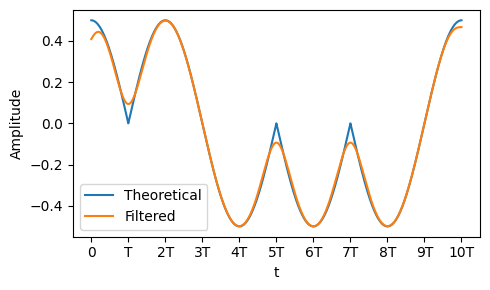

In [39]:

fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t/T,(x.real), label='Theoretical')
ax.plot(t/T, (s_filtered.real), label='Filtered')
tick_labels = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T', '9T', '10T']
ax.set_xticks(range(0, 11))
ax.set_xticklabels(tick_labels)
ax.set_xlabel('t')
ax.set_ylabel('Amplitude')
ax.legend()

plt.tight_layout()

plt.savefig('figures/analysis/amplitude_estimation.pdf')




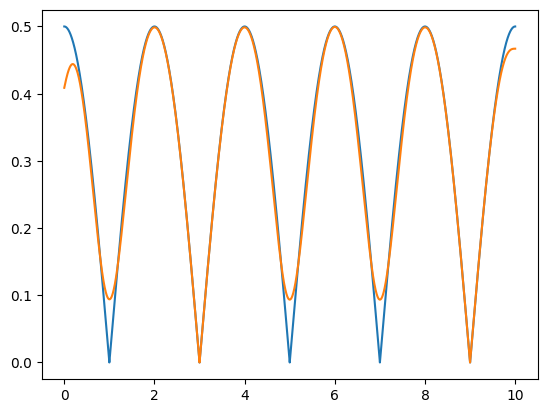

In [33]:
plt.plot(t/T,np.abs(x.real))
plt.plot(t/T, np.abs(s_filtered.real))

In [4]:
samples = 50
L0 = 50
T = 1/200
offset = np.linspace(-T,T,samples)
tau_hat = np.zeros(samples)
carrier = 22.35e3
fs = 4e6
sos = signal.butter(2,0.0006, 'low', output='sos')

s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=0, phase_offset=0, amplitude=1)
s_down = s*np.exp(-1j*2*np.pi*carrier*t)
s_down_filt = signal.sosfiltfilt(sos, s_down)
amplitude_estimation(s_down_filt[int(T*fs):-int((T*fs))])

0.9999992632053265

0.9982212934287666


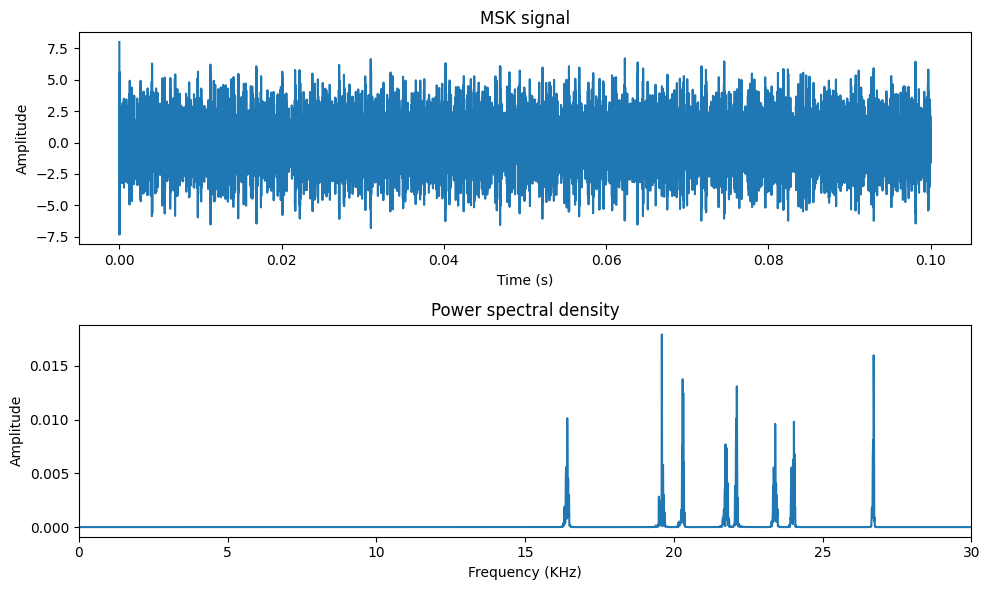

In [16]:
carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate
fs = 4e6
time = 0.1#0.5

t = np.linspace(0, time, int(fs*time))

# Generate the signal
msk_data_single = np.zeros((len(carriers), len(t)))
msk_data = np.zeros_like(t)
offset = np.zeros_like(carriers)
phase_offset = np.zeros_like(carriers)
amplitude = np.zeros_like(carriers)
data_true = np.zeros((len(carriers),int(time/T_symbols[0])))
phase = np.zeros((len(carriers),len(t)))
for i, (carrier, T) in enumerate(zip(carriers, T_symbols)):    
    offset[i] = random.uniform(0, T_symbols[i])
    phase_offset[i] = random.uniform(0, 2*np.pi)
    amplitude[i] = random.uniform(0.5, 2)
    amplitude[i] = 1.
    offset[i] = 0
    phase_offset[i] = 0
    msk_data_single[i], _, data_temp, phase[i] = generate_msk(int(time/T), 0.5, T, carrier, fs, offset=offset[i], phase_offset=phase_offset[i], amplitude=amplitude[i])
    msk_data += msk_data_single[i]
    data_true[i,0:int(time/T)] = data_temp[0:int(time/T)]
# Add noise
#msk_data += np.random.normal(0, 3, msk_data.shape)

msk_zeros = add_zeros(msk_data, 200e-6, 200e-6+10e-6, fs)

# calculate fft
f, fft_msk_data = signal.periodogram(msk_data, fs, nfft=len(msk_data))

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, msk_data)
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time (s)')
axs[0].set_title('MSK signal')


axs[1].plot(f/1e3, fft_msk_data)#10*np.log10(Pxx))
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Frequency (KHz)')
axs[1].set_title('Power spectral density')
axs[1].set_xlim(0, 30)
plt.tight_layout()

index = 5
sos = signal.butter(2,0.0001, 'low', output='sos')
s_down = msk_data*np.exp(-1j*2*np.pi*carriers[index]*t)
s_down_filt = signal.sosfiltfilt(sos, s_down)
print(amplitude_estimation(s_down_filt[int(T*fs):-int((T*fs))]))
